Case Study to Find the Root cause of High Attrition Rate in company
* Find next employyes who may leave the company
* Find out if anything is wrong in company policy
* Depending on company current situation best cost effective solution to retain best employees

This is reference dataset
Fields in the dataset include:

Satisfaction Level
Last evaluation
Number of projects
Average monthly hours
Time spent at the company
Whether they have had a work accident
Whether they have had a promotion in the last 5 years
Departments (column sales)
Salary
Whether the employee has left

That is the last thing anybody wants to hear from their employees. 
In a sense, it’s the employees who make the company. It’s the employees who do the work. It’s the employees who shape the company’s culture. Long-term success, a healthy work environment, and high employee retention are all signs of a successful company. But when a company experiences a high rate of employee turnover, then something is going wrong. This can lead the company to huge monetary losses by these innovative and valuable employees.

Companies that maintain a healthy organization and culture are always a good sign of future prosperity. Recognizing and understanding what factors that were associated with employee turnover will allow companies and individuals to limit this from happening and may even increase employee productivity and growth. These predictive insights give managers the opportunity to take corrective steps to build and preserve their successful business.

Buisness Problem : Company needs to know why the employees are leaving.
Client : 
Objective : Company wants to understand what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.
The goal is to create or improve different retention strategies on targeted employees. Overall, the implementation of this model will allow management to create better decision-making actions.

In [1]:
# Import libraries necessary for this project\n",
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from IPython.display import display # Allows the use of display() for DataFrames,
from __future__ import division
%matplotlib inline

sns.set_style('whitegrid')

* Step 1 : Exploring Data 
* Extract the data from the source and then get a quick overview of what we are dealing with in our dataset.

In [3]:
data = pd.read_csv("../input/HR_comma_sep.csv")
display(data.shape)
display(data.head(n=3))
#display(data["promotion_last_5years"].unique())

(14999, 10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [4]:
# Statistical Analysis of Numerical Data
# We can analyse central tendency, dispersion and range of variables.
print(data.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

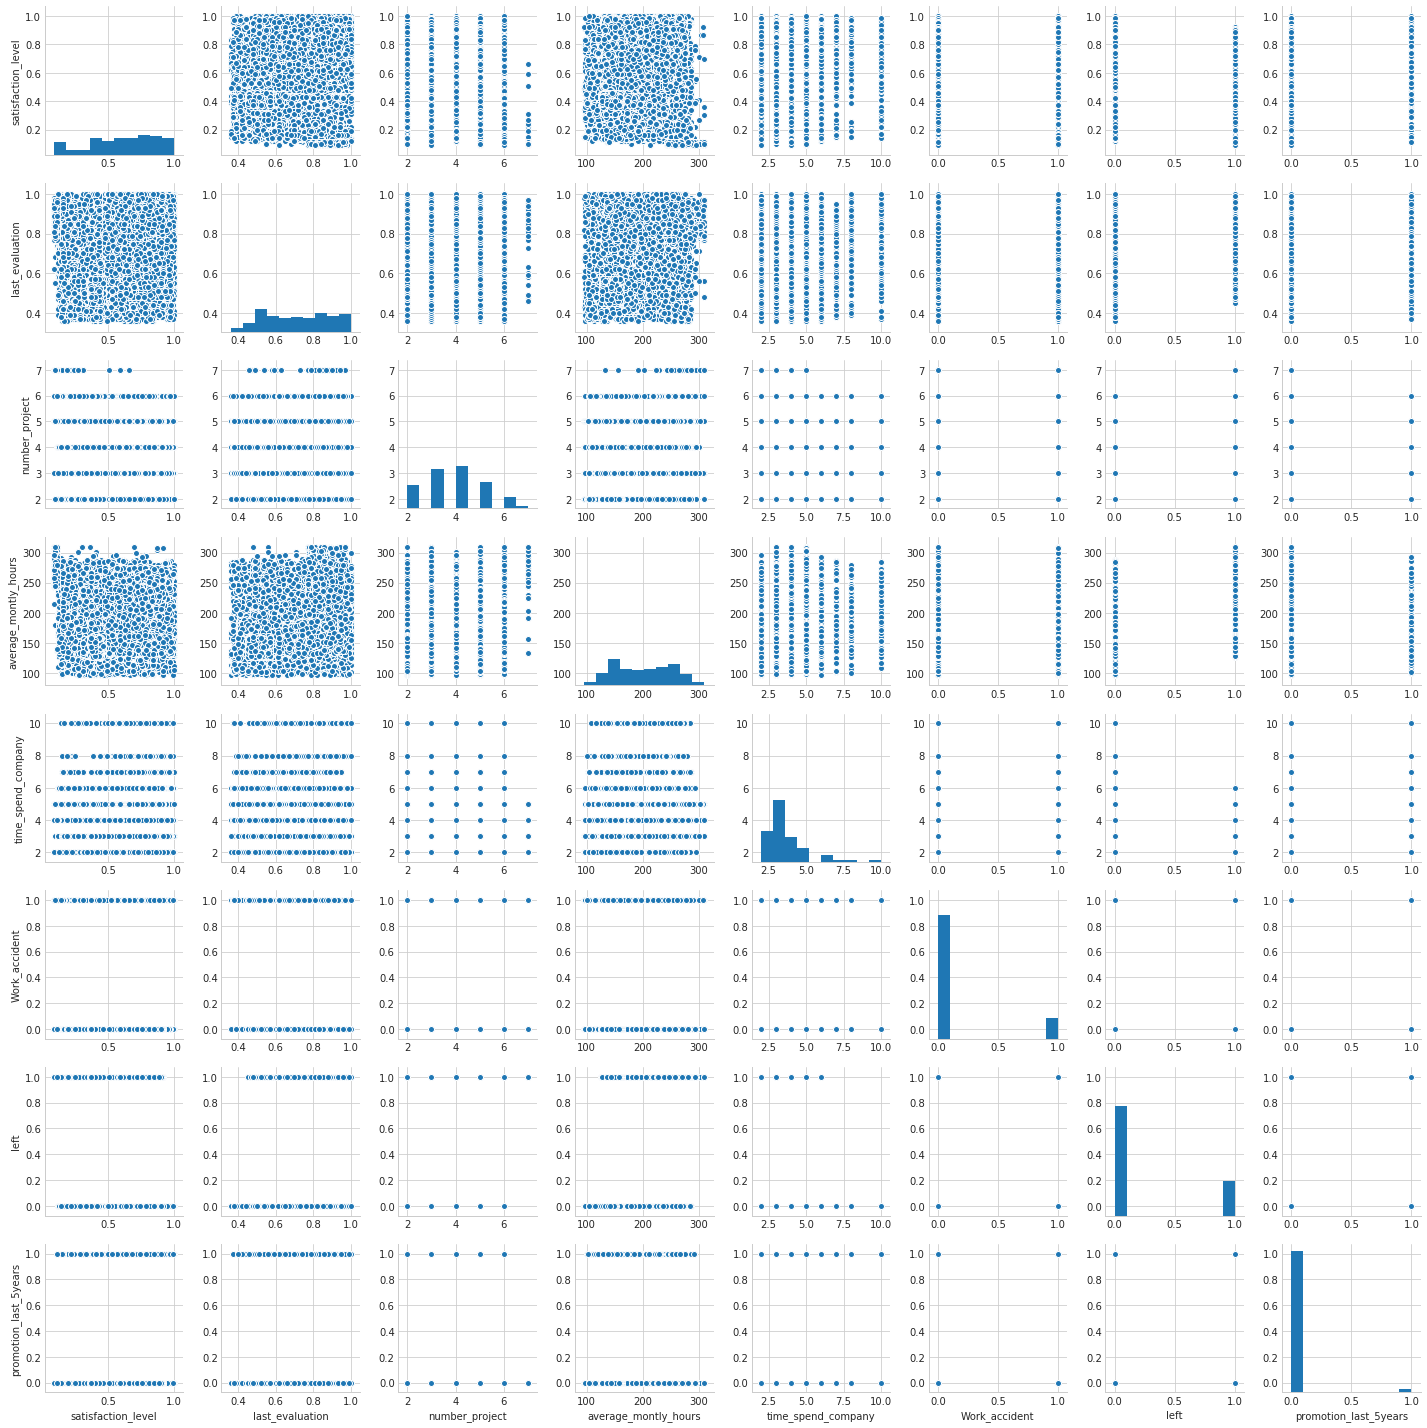

In [5]:
# To Visualise the relationship plot for all the variables and find the correlation
sns.pairplot(data)

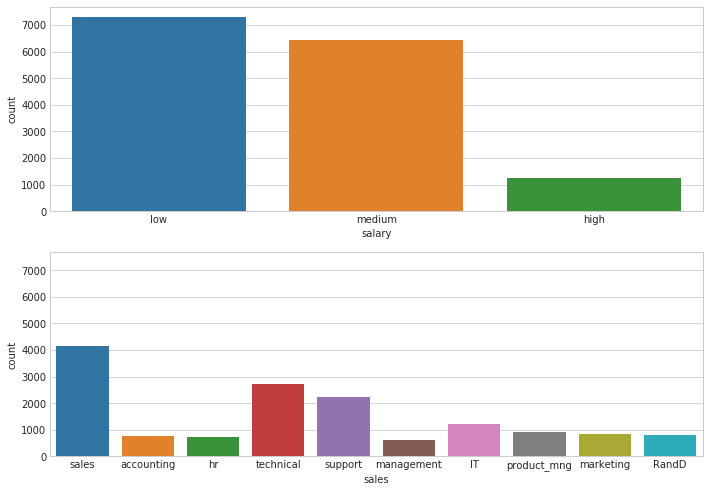

In [6]:
#plot the categorical variables
fig, (ax1, ax2) = plt.subplots(nrows=2, sharey=True)
fig.set_size_inches(11.7, 8.27)
sns.countplot(data["salary"],ax=ax1)
sns.countplot(data["sales"],ax=ax2)

In [7]:
# analyzing the left variable with sales and salary
left_class = pd.crosstab(index=data["left"],columns=[data["sales"],data["salary"]],margins=True)
(left_class/left_class.loc["All"])*100

sales           IT                               RandD                         \
salary        high         low      medium        high        low      medium   
left                                                                            
0        95.180723   71.756979   81.869159   92.156863   84.89011   83.333333   
1         4.819277   28.243021   18.130841    7.843137   15.10989   16.666667   
All     100.000000  100.000000  100.000000  100.000000  100.00000  100.000000   

sales   accounting                                  hr     ...      \
salary        high         low      medium        high     ...       
left                                                       ...       
0        93.243243   72.346369   70.149254   86.666667     ...       
1         6.756757   27.653631   29.850746   13.333333     ...       
All     100.000000  100.000000  100.000000  100.000000     ...       

sales        sales                             support              \
salary        high         low      medium        high         low   
left                                                                 
0        94.795539   66.793711   82.900677   94.326241   66.055846   
1         5.204461   33.206289   17.099323    5.673759   33.944154   
All     100.000000  100.000000  100.000000  100.000000  100.000000   

sales                technical                                All  
salary      medium        high        low      medium              
left                                                               
0        83.227176   87.562189   72.44898   74.367916   76.191746  
1        16.772824   12.437811   27.55102   25.632084   23.808254  
All     100.000000  100.000000  100.00000  100.000000  100.000000  

[3 rows x 31 columns]

In [8]:
# Convert Numerical Data to Categorical Variables to fit models

data["sales"] = data["sales"].astype("category")
data["sales"] = data["sales"].cat.codes
data["salary"] = data["salary"].astype("category")
data["salary"] = data["salary"].cat.codes
data["left"] = data["left"].astype("category")
data["left"] = data["left"].cat.codes
data[['number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']] = data[['number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']].astype("float")
data.dtypes
#display(data.head(n=3))

satisfaction_level       float64
last_evaluation          float64
number_project           float64
average_montly_hours     float64
time_spend_company       float64
Work_accident            float64
left                        int8
promotion_last_5years    float64
sales                       int8
salary                      int8
dtype: object

In [12]:
for feature in data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':",format(feature))
    display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
#outliers  = []

# Remove the outliers, if any were specified
#good_data = data.drop(data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature '{}': satisfaction_level


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary


Data points considered outliers for the feature '{}': last_evaluation


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary


Data points considered outliers for the feature '{}': number_project


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary


Data points considered outliers for the feature '{}': average_montly_hours


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary


Data points considered outliers for the feature '{}': time_spend_company


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1,0.80,0.86,5.0,262.0,6.0,0.0,1,0.0,7,2
17,0.78,0.99,4.0,255.0,6.0,0.0,1,0.0,7,1
34,0.84,0.87,4.0,246.0,6.0,0.0,1,0.0,3,1
47,0.57,0.70,3.0,273.0,6.0,0.0,1,0.0,8,1
67,0.90,0.98,4.0,264.0,6.0,0.0,1,0.0,6,2
83,0.84,0.85,4.0,249.0,6.0,0.0,1,0.0,5,1
99,0.90,1.00,5.0,221.0,6.0,0.0,1,0.0,7,2
122,0.75,1.00,4.0,216.0,6.0,0.0,1,0.0,9,1
161,0.90,0.98,5.0,243.0,6.0,0.0,1,0.0,5,1
191,0.92,0.87,4.0,226.0,6.0,1.0,1,0.0,9,2


Data points considered outliers for the feature '{}': Work_accident


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
18,0.45,0.51,2.0,160.0,3.0,1.0,1,1.0,7,1
68,0.76,0.86,5.0,223.0,5.0,1.0,1,0.0,6,2
120,0.14,0.62,4.0,158.0,4.0,1.0,1,0.0,9,1
123,0.11,0.84,6.0,300.0,5.0,1.0,1,0.0,8,1
136,0.10,0.84,6.0,283.0,4.0,1.0,1,0.0,9,1
148,0.84,0.88,4.0,263.0,5.0,1.0,1,0.0,5,1
191,0.92,0.87,4.0,226.0,6.0,1.0,1,0.0,9,2
256,0.11,0.81,6.0,266.0,4.0,1.0,1,0.0,7,2
258,0.88,0.88,5.0,232.0,5.0,1.0,1,0.0,2,2
276,0.10,0.97,6.0,267.0,4.0,1.0,1,0.0,8,1


Data points considered outliers for the feature '{}': left


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1,0.0,7,1
1,0.80,0.86,5.0,262.0,6.0,0.0,1,0.0,7,2
2,0.11,0.88,7.0,272.0,4.0,0.0,1,0.0,7,2
3,0.72,0.87,5.0,223.0,5.0,0.0,1,0.0,7,1
4,0.37,0.52,2.0,159.0,3.0,0.0,1,0.0,7,1
5,0.41,0.50,2.0,153.0,3.0,0.0,1,0.0,7,1
6,0.10,0.77,6.0,247.0,4.0,0.0,1,0.0,7,1
7,0.92,0.85,5.0,259.0,5.0,0.0,1,0.0,7,1
8,0.89,1.00,5.0,224.0,5.0,0.0,1,0.0,7,1
9,0.42,0.53,2.0,142.0,3.0,0.0,1,0.0,7,1


Data points considered outliers for the feature '{}': promotion_last_5years


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
18,0.45,0.51,2.0,160.0,3.0,1.0,1,1.0,7,1
82,0.79,0.59,4.0,139.0,3.0,0.0,1,1.0,4,1
171,0.41,0.46,2.0,160.0,3.0,0.0,1,1.0,7,1
287,0.11,0.79,6.0,292.0,4.0,0.0,1,1.0,9,1
584,0.41,0.56,2.0,154.0,3.0,0.0,1,1.0,8,2
751,0.46,0.45,2.0,138.0,3.0,0.0,1,1.0,0,1
1000,0.87,1.00,4.0,258.0,5.0,1.0,1,1.0,7,2
1667,0.44,0.55,2.0,128.0,3.0,0.0,1,1.0,0,2
4499,0.94,0.80,5.0,111.0,4.0,0.0,0,1.0,1,2
4500,0.58,0.71,4.0,145.0,3.0,1.0,0,1.0,1,2


Data points considered outliers for the feature '{}': sales


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary


Data points considered outliers for the feature '{}': salary


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary


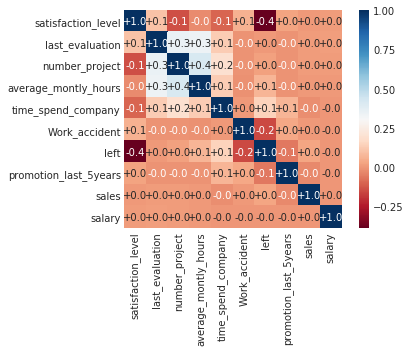

In [13]:
# To check the correlation between variables we use pearsonr correaltions for finding strength between linear relationships
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,square=True, annot=True,
                     cmap='RdBu', fmt='+.1f')

Text(0.5,1,'Employee Salary Turnover Distribution')

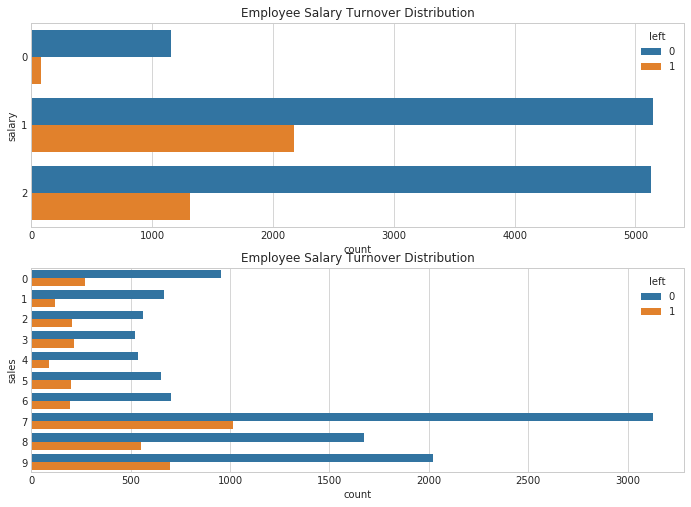

In [14]:
#plot the categorical variables
fig, (ax1, ax2) = plt.subplots(nrows=2)
fig.set_size_inches(11.7, 8.27)
sns.countplot(y="salary", hue='left', data=data,ax=ax1).set_title('Employee Salary Turnover Distribution')
sns.countplot(y="sales", hue='left', data=data,ax=ax2).set_title('Employee Salary Turnover Distribution')

In [15]:
left_pc = (data[data["left"]==1].count()/data.count())*100
display(left_pc[0])

23.80825388359224

In [64]:
target_label = data["left"]
features = data.drop("left",axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target_label, test_size=0.2, random_state=20)
print (format(X_train.shape[0]))
print (format(X_test.shape[0]))

11999
3000


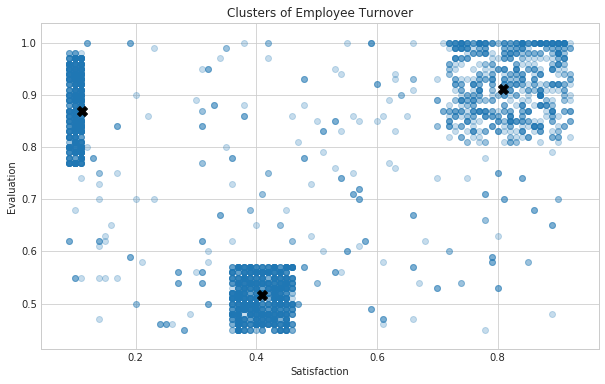

In [65]:
from sklearn.cluster import KMeans

featureSet1 = data[data.left==1][["satisfaction_level","last_evaluation"]]
kmeans = KMeans(n_clusters=3,random_state=20).fit(featureSet1)

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction_level",y="last_evaluation", data=data[data.left==1],
            alpha=0.25)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

In [77]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, fbeta_score
from sklearn.metrics import classification_report

clf = AdaBoostClassifier(random_state=20, n_estimators=20)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print("Accuracy=",accuracy_score(y_test,pred))
print("F-score=",fbeta_score(y_test,pred,beta=0.5))
print(classification_report(y_test,pred))
importances = clf.feature_importances_

Accuracy= 0.949
F-score= 0.893318038428
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2297
          1       0.90      0.89      0.89       703

avg / total       0.95      0.95      0.95      3000



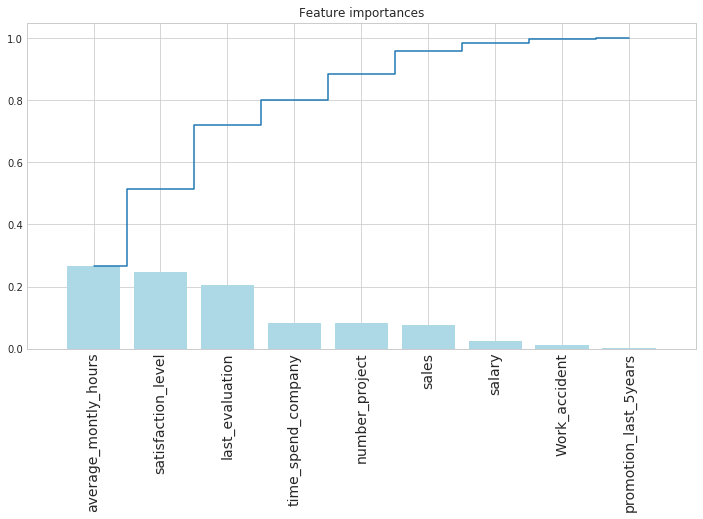

In [67]:
col_names = features.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), col_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()